In [2]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('Iris.csv')

In [21]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df = df.iloc[:,1:]

In [24]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
df['Species'] = encoder.fit_transform(df['Species'])

In [31]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [33]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


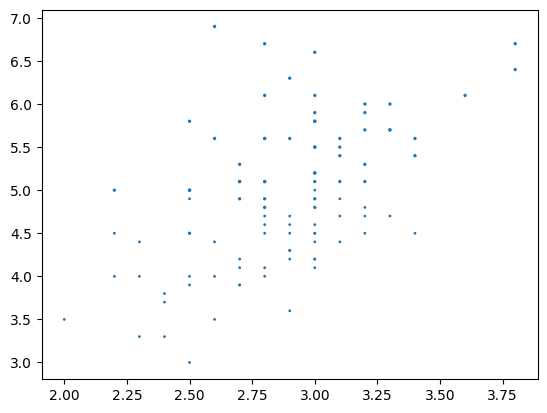

In [39]:
import matplotlib.pyplot as plt
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],df['Species'])
plt.show()

In [50]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
101,2.7,5.1,2
65,3.1,4.4,1
100,3.3,6.0,2
50,3.2,4.7,1
59,2.7,3.9,1
71,2.8,4.0,1
109,3.6,6.1,2
68,2.2,4.5,1
57,2.4,3.3,1


In [58]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(10, 3)
(5, 3)
(5, 3)


In [60]:
X_test = df_val.iloc[:,0:2]
y_test = df_val.iloc[:,2]

In [63]:
df_val

,SepalWidthCm,PetalLengthCm,Species
148,3.4,5.4,2
62,2.2,4.0,1
70,3.2,4.8,1
69,2.5,3.9,1
118,2.6,6.9,2


In [67]:
df_bag = df_train.sample(8,replace = True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
95,3.0,4.2,1
107,2.9,6.3,2
107,2.9,6.3,2
135,3.0,6.1,2
85,3.4,4.5,1
89,2.5,4.0,1
95,3.0,4.2,1
85,3.4,4.5,1


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

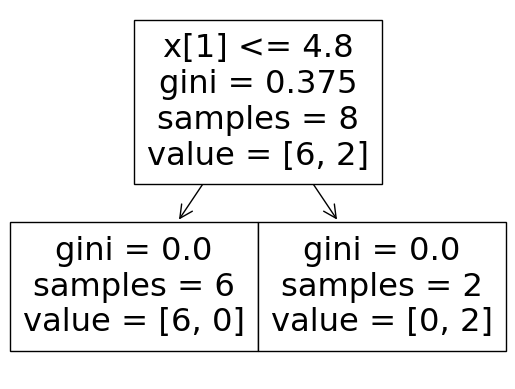

0.8


In [117]:
dt_bag1 = DecisionTreeClassifier()

df_bag = df_train.sample(8,replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

evaluate(dt_bag1,X,y)

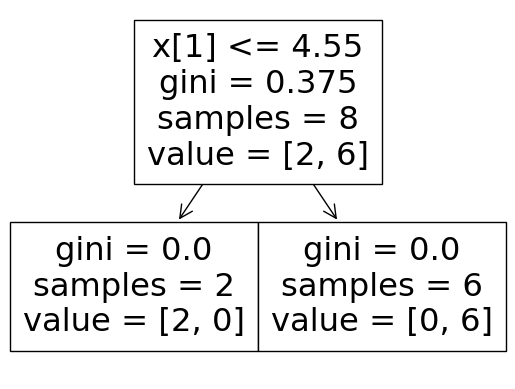

0.8


In [118]:
# Data for Tree 1
dt_bag2 = DecisionTreeClassifier()
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
evaluate(dt_bag2,X,y)

In [92]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

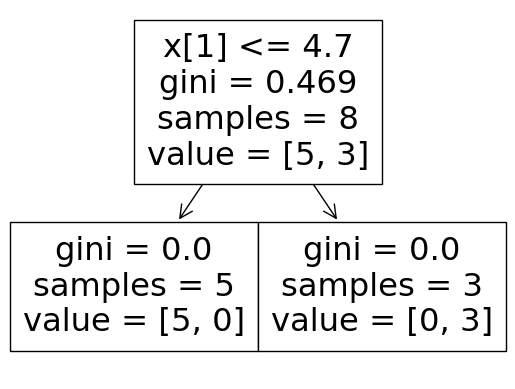

0.8


In [119]:
# Data for Tree 1
dt_bag3 = DecisionTreeClassifier()
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
evaluate(dt_bag3,X,y)

In [121]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\Aoun Haider\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Aoun Haider\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Aoun Haider\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [126]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [128]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
13,14,4.3,3.0,1.1,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
57,58,4.9,2.4,3.3,1.0,Iris-versicolor


In [146]:
df1.sample(2,replace = True,axis = 1)

,SepalWidthCm,Species
82,2.7,Iris-versicolor
50,3.2,Iris-versicolor
16,3.9,Iris-setosa
59,2.7,Iris-versicolor
13,3.0,Iris-setosa
146,2.5,Iris-virginica
38,3.0,Iris-setosa
51,3.2,Iris-versicolor
54,2.8,Iris-versicolor
57,2.4,Iris-versicolor


In [158]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalWidthCm,Id
59,2.7,60
50,3.2,51
59,2.7,60
16,3.9,17
59,2.7,60
57,2.4,58
38,3.0,39
146,2.5,147
